### Introduction to NLP and Transformers: Building a News Sentiment Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, Flatten, SimpleRNN
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

### Keras and Text

In [19]:
sents = ['This is the first', 'this is the second', 'ich heisse Jacob, und ich wohne im New York']

In [20]:
#instantiate the tokenizer
tokenizer = Tokenizer(num_words = 20)

In [21]:
#fit on texts
tokenizer.fit_on_texts(sents)

In [22]:
#create sequences based on fit
tokenizer.texts_to_sequences(sents)

[[1, 2, 3, 5], [1, 2, 3, 6], [4, 7, 8, 9, 4, 10, 11, 12, 13]]

In [23]:
#print sentences
sents

['This is the first',
 'this is the second',
 'ich heisse Jacob, und ich wohne im New York']

In [24]:
#one hot encode with to_matrix
tokenizer.texts_to_matrix(sents)

array([[0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 0.]])

In [25]:
#examine the word_index
tokenizer.word_index

{'this': 1,
 'is': 2,
 'the': 3,
 'ich': 4,
 'first': 5,
 'second': 6,
 'heisse': 7,
 'jacob': 8,
 'und': 9,
 'wohne': 10,
 'im': 11,
 'new': 12,
 'york': 13}

### A Basic Neural Network Approach

In [30]:
news = pd.read_csv('data/all-data.csv',  encoding = 'latin-1', header = None)

In [31]:
news.columns = ['sentiment', 'headline']

In [32]:
news.head()

,sentiment,headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [64]:
tokenizer = Tokenizer(num_words = 2000)

In [65]:
#pass the numpy array as input
tokenizer.fit_on_texts(news['headline'].values)

In [66]:
dtm = tokenizer.texts_to_matrix(news['headline'].values)

In [67]:
model = Sequential()
model.add(Dense(32, input_shape = (2000,)))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', metrics = ['acc'])

In [68]:
#define y
y = news['sentiment']
def sentimenter(x):
    d = {'negative': 0, 'neutral': 1, 'positive': 2}
    return d[x]

In [69]:
y = y.apply(sentimenter)

In [70]:
# y[:10]

In [71]:
y = to_categorical(y)

In [72]:
news.shape

(4846, 2)

In [73]:
#split the data
x_train, x_test, y_train, y_test = train_test_split(dtm, y, random_state = 22)

In [74]:
#fit the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 10)

Epoch 1/10
114/114 [==============================] - 0s 2ms/step - loss: 0.8241 - acc: 0.6533 - val_loss: 0.7214 - val_acc: 0.6931
Epoch 2/10
114/114 [==============================] - 0s 1ms/step - loss: 0.6171 - acc: 0.7578 - val_loss: 0.6257 - val_acc: 0.7450
Epoch 3/10
114/114 [==============================] - 0s 1ms/step - loss: 0.4899 - acc: 0.8209 - val_loss: 0.5829 - val_acc: 0.7607
Epoch 4/10
114/114 [==============================] - 0s 1ms/step - loss: 0.4093 - acc: 0.8453 - val_loss: 0.5739 - val_acc: 0.7632
Epoch 5/10
114/114 [==============================] - 0s 2ms/step - loss: 0.3571 - acc: 0.8671 - val_loss: 0.5696 - val_acc: 0.7665
Epoch 6/10
114/114 [==============================] - 0s 2ms/step - loss: 0.3184 - acc: 0.8795 - val_loss: 0.5799 - val_acc: 0.7657
Epoch 7/10
114/114 [==============================] - 0s 2ms/step - loss: 0.2884 - acc: 0.8927 - val_loss: 0.6005 - val_acc: 0.7583
Epoch 8/10
114/114 [==============================] - 0s 2ms/step - loss: 0.

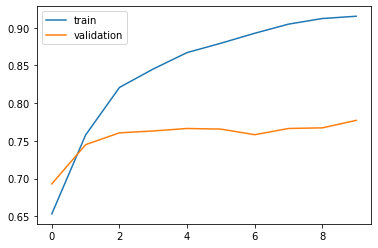

In [75]:
#examine performance
plt.plot(history.history['acc'], label = 'train')
plt.plot(history.history['val_acc'], label = 'validation')
plt.legend();

### Word Embeddings

> *Word embedding is any of a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers. Conceptually it involves a mathematical embedding from a space with many dimensions per word to a continuous vector space with a much lower dimension.* -- [Wikipedia](https://en.wikipedia.org/wiki/Word_embedding)

In [76]:
from keras.layers import Embedding

In [96]:
#using the embedding layer
model = Sequential()
model.add(Embedding(2000, 32, input_length = 2000))
model.add(Flatten())
model.add(Dense(32))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', metrics = ['acc'])

In [97]:
y_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [98]:
#fit the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 10)

Epoch 1/10
114/114 [==============================] - 3s 26ms/step - loss: 1.3513 - acc: 0.5960 - val_loss: 0.7422 - val_acc: 0.7054
Epoch 2/10
114/114 [==============================] - 3s 26ms/step - loss: 0.5600 - acc: 0.7755 - val_loss: 0.5629 - val_acc: 0.7739
Epoch 3/10
114/114 [==============================] - 3s 25ms/step - loss: 0.4109 - acc: 0.8442 - val_loss: 0.6285 - val_acc: 0.7426
Epoch 4/10
114/114 [==============================] - 3s 25ms/step - loss: 0.3339 - acc: 0.8767 - val_loss: 0.6085 - val_acc: 0.7657
Epoch 5/10
114/114 [==============================] - 3s 26ms/step - loss: 0.2932 - acc: 0.8949 - val_loss: 0.6532 - val_acc: 0.7690
Epoch 6/10
114/114 [==============================] - 3s 27ms/step - loss: 0.2570 - acc: 0.9064 - val_loss: 0.7081 - val_acc: 0.7649
Epoch 7/10
114/114 [==============================] - 3s 24ms/step - loss: 0.2278 - acc: 0.9161 - val_loss: 0.7985 - val_acc: 0.7434
Epoch 8/10
114/114 [==============================] - 3s 23ms/step - 

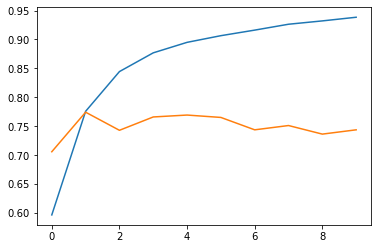

In [99]:
#plot results
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

### Sequential Models

In [100]:
from keras.layers import SimpleRNN

In [101]:
#using a SimpleRNN
seqmodel = Sequential()
seqmodel.add(Embedding(2000, 32))
seqmodel.add(SimpleRNN(32))
seqmodel.add(Dense(3, activation = 'softmax'))
seqmodel.compile(loss = 'categorical_crossentropy', metrics = ['acc'])

In [102]:
#fit the model
seqmodel.fit(x_train, y_train)

114/114 [==============================] - 47s 414ms/step - loss: 0.9298 - acc: 0.5922


In [ ]:
#examine performance


### More Transfer Learning: SpaCy Transformers with Keras

In [104]:
#pip install spacy
#python -m spacy download en_core_web_lg

In [103]:
import spacy

In [105]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

In [106]:
nlp = spacy.load('en_core_web_lg')

In [107]:
sentence = 'My dog sleeps on the bed.'

In [108]:
#turn into nlp object
doc = nlp(sentence)

In [110]:
#examine some attributes
for w in doc:
    print(w.text, w.pos)

My 90
dog 92
sleeps 100
on 85
the 90
bed 92
. 97


In [112]:
#doc.vector
doc.vector.shape

(300,)

### Pretrained Models

![](https://1.bp.blogspot.com/-RLAbr6kPNUo/W9is5FwUXmI/AAAAAAAADeU/5y9466Zoyoc96vqLjbruLK8i_t8qEdHnQCLcBGAs/s640/image3.png)

In [ ]:
#!python -m spacy download en_trf_bertbaseuncased_lg 

In [113]:
nlp = spacy.load("en_trf_bertbaseuncased_lg")

In [114]:
apple1 = nlp("Apple shares rose on the news.")
apple2 = nlp("Apple sold fewer iPhones this quarter.")
apple3 = nlp("Apple pie is delicious.")
print(apple1[0].similarity(apple2[0]))  # 0.73428553
print(apple1[0].similarity(apple3[0]))  # 0.43365782

0.7342852
0.43365702


In [115]:
doc1 = nlp('My dogs sleep on the bed.')
doc2 = nlp('My dogs eat dinner in the garage.')
doc3 = nlp('My dogs are ride or die.')

In [116]:
for token in doc3:
    print(token.text, token.pos_, token.tag_, token.is_stop)

My   True
dogs   False
are   True
ride   False
or   True
die   False
.   False


In [117]:
#check similarity
doc1.similarity(doc2)

0.8494800354230787

In [118]:
#doc1 doc3 similarity
doc1.similarity(doc3)

0.6500362364856437

### Training a Model

In [ ]:
#simple network model


#compile


#fit


In [ ]:
#examine the loss


### Keras and BERT

In [ ]:
#!pip install spacy-transformers

In [119]:
from sklearn.base import TransformerMixin, BaseEstimator

In [120]:
#a custom transformer class
class WordVectorTransformer(TransformerMixin, BaseEstimator):
    def __init__(self, model = 'en_trf_bertbaseuncased_lg'):
        self.model = model
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        nlp = spacy.load(self.model)
        return np.concatenate([nlp(doc).vector.reshape(1, -1) for doc in X])

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
#make a pipeline
pipe = make_pipeline(WordVectorTransformer(), LogisticRegression())

In [124]:
x_train, x_test, y_train, y_test = train_test_split(news['headline'], news['sentiment'])

In [125]:
#fit it
pipe.fit(x_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('wordvectortransformer', WordVectorTransformer()),
                ('logisticregression', LogisticRegression())])

In [126]:
#score it
pipe.score(x_test, y_test)

0.7821782178217822

### Trying other estimators

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#make a pipeline


In [ ]:
#fit it


In [ ]:
#train score


In [ ]:
#test score


### Keras and sklearn

In [ ]:
from keras.callbacks import CSVLogger

In [ ]:
hist_callback = CSVLogger('test.csv', append = True)

In [ ]:
#add a callback


#define a network


#create the keras regressor


In [ ]:
#make a pipeline


In [ ]:
#fit the pipeline


In [ ]:
#score train


In [ ]:
#score the test
